# Foundations of AI & ML
## Session 07
### CaseStudy 2






This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Link to dataset used- [Daily Minimum Temperatures](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line)

### Step1: The code below will load the dataset as a Pandas Series

In [1]:
from matplotlib import pyplot
from pandas import Series
series = Series.from_csv('daily-minimum-temperatures-in-me.csv', header=0)
print(series.head())
series.plot()
pyplot.show()


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64


### Step2 : The example below creates a lagged version of the Minimum Daily Temperatures data set
The data takes the previos day (t-1) temp as X and current day( t) temp as Y. You can also take (t-2) temp as X1, (t-1) as X2 so, the data is 2-dimensional and (t) temp as Y

In [2]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head)

<bound method NDFrame.head of        t-1   t+1
0      NaN  20.7
1     20.7  17.9
2     17.9  18.8
3     18.8  14.6
4     14.6  15.8
5     15.8  15.8
6     15.8  15.8
7     15.8  17.4
8     17.4  21.8
9     21.8  20.0
10    20.0  16.2
11    16.2  13.3
12    13.3  16.7
13    16.7  21.5
14    21.5  25.0
15    25.0  20.7
16    20.7  20.6
17    20.6  24.8
18    24.8  17.7
19    17.7  15.5
20    15.5  18.2
21    18.2  12.1
22    12.1  14.4
23    14.4  16.0
24    16.0  16.5
25    16.5  18.7
26    18.7  19.4
27    19.4  17.2
28    17.2  15.5
29    15.5  15.1
...    ...   ...
3620  13.3  13.2
3621  13.2  16.2
3622  16.2  17.3
3623  17.3  20.5
3624  20.5  20.2
3625  20.2  19.4
3626  19.4  15.5
3627  15.5  14.1
3628  14.1  11.0
3629  11.0  11.1
3630  11.1  14.0
3631  14.0  11.4
3632  11.4  12.5
3633  12.5  13.4
3634  13.4  13.6
3635  13.6  13.9
3636  13.9  17.2
3637  17.2  14.7
3638  14.7  15.4
3639  15.4  13.1
3640  13.1  13.2
3641  13.2  13.9
3642  13.9  10.0
3643  10.0  12.9
3644  12.9  14.6
3

### Step3 : Splitt the data into train and test

In [3]:
# split into train and test sets
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize

X = (dataframe.values[1:,:])
#X = normalize(X)
#print(X)

train, test = shuffle(X[1:len(X)-800]), shuffle(X[len(X)-800:])

train_X, train_y = train[:,0].reshape(-1, 1), train[:,1].reshape(-1, 1)
test_X, test_y = test[:,0].reshape(-1, 1), test[:,1].reshape(-1, 1)

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(2848, 1) (2848, 1)
(800, 1) (800, 1)


### Step4 : Applying LInear regression

In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X, train_y)

# Make predictions using the testing set
pred_y = regr.predict(test_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pred_y))
#print(pred_y)

Coefficients: 
 [[0.76542348]]
Mean squared error: 5.98


### Step5: PLot the graph

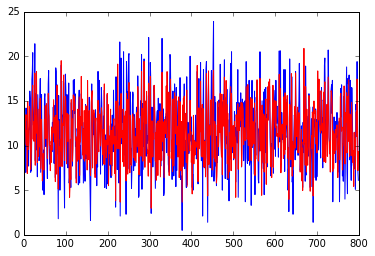

In [12]:
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(pred_y, color='red')
pyplot.show()

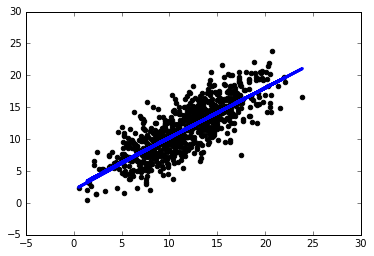

In [20]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, pred_y, color='blue', linewidth=3)
plt.show()

### Step6 : Applying Non-Linear Regression

In [21]:
from sklearn.neural_network import MLPRegressor

In [28]:
clf = MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.0001, batch_size=4,
    learning_rate='adaptive',learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=False,
    random_state=2, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)



In [29]:
clf.fit(train_X, train_y)
print(clf.coefs_)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[ 7.56612247e-001, -1.24500328e-001,  1.07335079e-001,
        -1.63063626e-002, -2.55146026e-159,  1.98043919e-001,
        -5.62965670e-001,  5.28464223e-003, -4.87836048e-001,
        -5.04452455e-123]]), array([[ 8.94765266e-001],
       [-6.96440632e-001],
       [-1.72179354e-001],
       [-2.54078980e-005],
       [ 2.90763909e-094],
       [ 6.11030507e-001],
       [-5.92159023e-001],
       [-4.66867402e-001],
       [-5.44579163e-001],
       [-2.62210461e-144]])]


In [30]:
# Make predictions using the testing set

pred_y = clf.predict(test_X)
#print(pred_y)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pred_y))

Coefficients: 
 [[0.76542348]]
Mean squared error: 5.96


### Step6 : PLot the graph

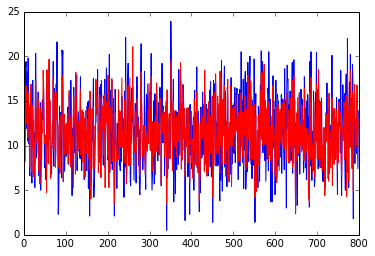

In [32]:
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(pred_y, color='red')
pyplot.show()